In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [88]:
file_path = 'C:/Users/user/Downloads/iris/iris.data'

# Define column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the data
try:
    iris_data_df = pd.read_csv(file_path, header=None, names=columns)
    print("iris.data loaded successfully.")
    display(iris_data_df.head())
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

iris.data loaded successfully.


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:

file_path2='C:/Users/user/Downloads/iris/bezdekIris.data'
# define columns
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
try:
    bezdekIris_data_df= pd.read_csv(file_path2, header=None, names=columns)
    print("bezdekIris_data loaded successfully.")
    display(bezdekIris_data_df.head())
except FileNotFoundError: #File is missing.
    print(f"Error: The file at {file_path} was not found.")
except pd.errors.ParserError:# File exists, but it's unreadable.
    print("Error: Could not parse the CSV file.")
except Exception as e:#
    print(f"An unexpected error occurred: {e}")

bezdekIris_data loaded successfully.


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris_data_df.shape

(150, 5)

In [52]:
bezdekIris_data_df.shape

(150, 5)

In [54]:

combined_df = pd.concat([bezdekIris_data_df, iris_data_df], ignore_index=True)


In [56]:
combined_df.shape

(300, 5)

In [58]:
combined_df[combined_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
142,5.8,2.7,5.1,1.9,Iris-virginica
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa
152,4.7,3.2,1.3,0.2,Iris-setosa
153,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
295,6.7,3.0,5.2,2.3,Iris-virginica
296,6.3,2.5,5.0,1.9,Iris-virginica
297,6.5,3.0,5.2,2.0,Iris-virginica
298,6.2,3.4,5.4,2.3,Iris-virginica


In [60]:
combined_df = combined_df.drop_duplicates()

In [62]:
combined_df.shape

(149, 5)

In [64]:
combined_df.isnull().values.any()

False

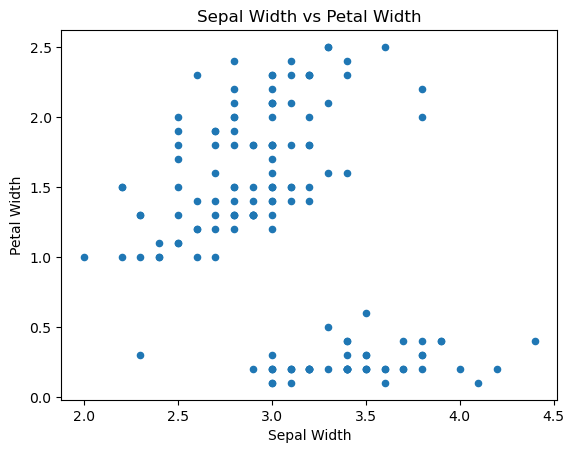

In [66]:
combined_df.plot(kind='scatter', x='sepal_width', y='petal_width')
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()


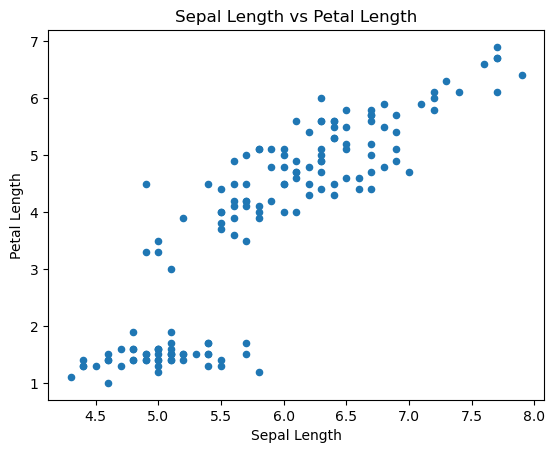

In [68]:
combined_df.plot(kind='scatter', x='sepal_length', y='petal_length')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [70]:
groupeddf = combined_df.groupby('class')

In [72]:
groupeddf.describe()

sepal_length                                               \
                       count      mean       std  min  25%  50%  75%  max   
class                                                                       
Iris-setosa             50.0  5.006000  0.352490  4.3  4.8  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
Iris-virginica          49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

                sepal_width            ... petal_length      petal_width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            50.0  3.428000  ...        1.575  1.9        50.0   
Iris-versicolor        50.0  2.770000  ...        4.600  5.1        50.0   
Iris-virginica         49.0  2.979592  ...        5.900  6.9        49.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
class                                                         
Iris-setosa      0.246000  0.105386  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.028571  0.276887  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [74]:
mean_width =  combined_df[['petal_width','sepal_width']].mean()
print(mean_width)

petal_width    1.194631
sepal_width    3.059732
dtype: float64


In [76]:
mean_length =  combined_df[['petal_length','sepal_length']].mean()
print(mean_width)

petal_width    1.194631
sepal_width    3.059732
dtype: float64


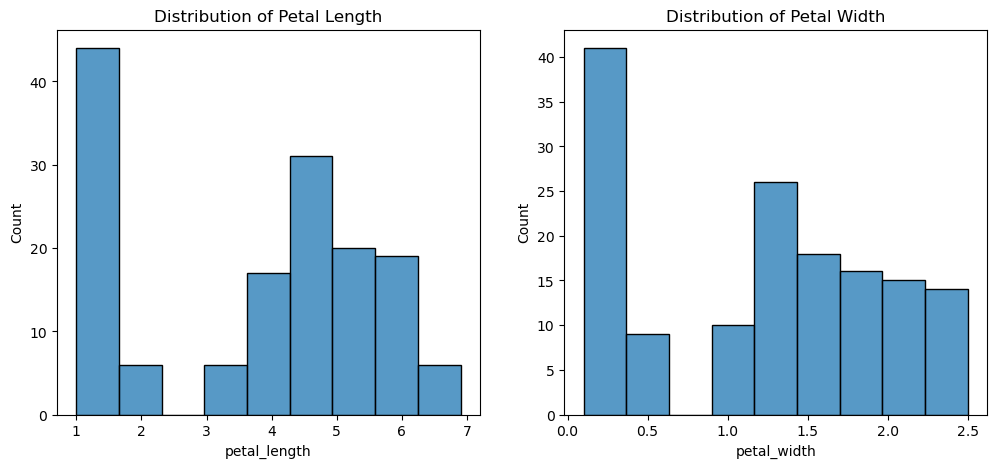

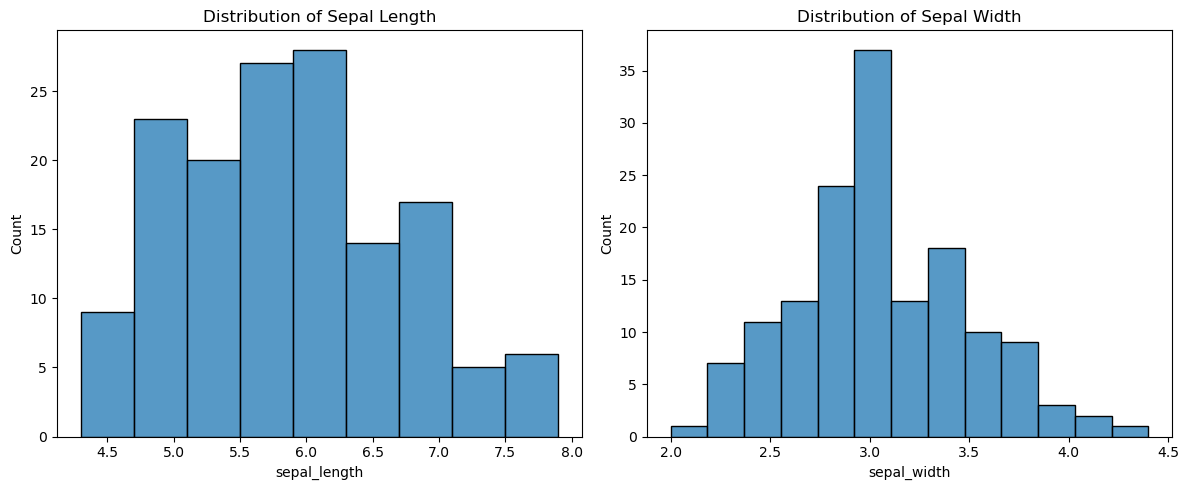

In [84]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of petal length and width
sns.histplot(data=combined_df, x='petal_length', ax=ax1)
ax1.set_title('Distribution of Petal Length')

sns.histplot(data=combined_df, x='petal_width', ax=ax2)
ax2.set_title('Distribution of Petal Width')
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=combined_df, x='sepal_length', ax=ax3)
ax3.set_title('Distribution of Sepal Length')

sns.histplot(data=combined_df, x='sepal_width', ax=ax4)
ax4.set_title('Distribution of Sepal Width')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()
